

---
---

* Importing Needed Libraries :


---





In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import gaussian_kde



---
* Reading data from its CSV file :
---



In [38]:
df = pd.read_csv("/content/final_internship_data.csv")



---
* Displaying the first few rows of the dataset :
---



In [39]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


User ID          User Name       Driver Name Car Condition Weather  \
0  KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1  lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2  gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3  9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4  8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   

   Traffic Condition                            key  fare_amount  \
0  Congested Traffic    2009-06-15 17:26:21.0000001          4.5   
1       Flow Traffic    2010-01-05 16:52:16.0000002         16.9   
2  Congested Traffic   2011-08-18 00:35:00.00000049          5.7   
3       Flow Traffic    2012-04-21 04:30:42.0000001          7.7   
4  Congested Traffic  2010-03-09 07:51:00.000000135          5.3   

       pickup_datetime  pickup_longitude  ...  month  weekday  year  \
0  2009-06-15 17:26:21         -1.288826  ...      6        0  2009   
1  2010-01-05 16:52:16         -1.291824  ...      1        1  2010   
2  2011-08-18 00:35:00         -1.291242  ...      8        3  2011   
3  2012-04-21 04:30:42         -1.291319  ...      4        5  2012   
4  2010-03-09 07:51:00         -1.290987  ...      3        1  2010   

    jfk_dist   ewr_dist   lga_dist   sol_dist   nyc_dist  distance   bearing  
0  20.265840  55.176046  14.342611  34.543548  27.572573  1.030764 -2.918897  
1  44.667679  31.832358  23.130775  15.125872   8.755732  8.450134 -0.375217  
2  43.597686  33.712082  19.865289  17.722624   9.847344  1.389525  2.599961  
3  42.642965  32.556289  21.063132  15.738963   7.703421  2.799270  0.133905  
4  43.329953  39.406828  15.219339  23.732406  15.600745  1.999157 -0.502703  

[5 rows x 26 columns]



---
* Displaying number of rows and columns in the dataset :
---



In [40]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 500000
Number of columns: 26




---
* Displaying infos about the dataset regarding Features in the dataset , their datatypes and memory usage :
---



In [41]:
print("\nBasic information about the dataset:")
df.info()


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day          



---
* Displaying the summary statistics for integer columns :
---



In [42]:
print("\nSummary statistics for integer columns:")
df.describe()


Summary statistics for integer columns:


fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  500000.000000     500000.000000    500000.000000      499995.000000   
mean       11.358361         -1.265712         0.696740          -1.265755   
std         9.916617          0.206941         0.140909           0.205903   
min       -44.900000        -52.119764       -54.389440         -59.049665   
25%         6.000000         -1.291405         0.710958          -1.291393   
50%         8.500000         -1.291226         0.711268          -1.291197   
75%        12.500000         -1.290970         0.711520          -1.290908   
max       500.000000         37.360538        29.724576           0.712985   

       dropoff_latitude  passenger_count           hour            day  \
count     499995.000000    500000.000000  500000.000000  500000.000000   
mean           0.696675         1.683428      13.510834      15.684206   
std            0.128997         1.307395       6.511571       8.681066   
min          -44.676047         0.000000       0.000000       1.000000   
25%            0.710943         1.000000       9.000000       8.000000   
50%            0.711277         1.000000      14.000000      16.000000   
75%            0.711538         2.000000      19.000000      23.000000   
max            7.061893         6.000000      23.000000      31.000000   

               month        weekday           year       jfk_dist  \
count  500000.000000  500000.000000  500000.000000  499995.000000   
mean        6.268650       3.042008    2011.739132     385.279367   
std         3.437815       1.949240       1.860889    2419.087483   
min         1.000000       0.000000    2009.000000       1.017646   
25%         3.000000       1.000000    2010.000000      41.341514   
50%         6.000000       3.000000    2012.000000      42.523163   
75%         9.000000       5.000000    2013.000000      43.785649   
max        12.000000       6.000000    2015.000000   30133.067880   

            ewr_dist       lga_dist       sol_dist       nyc_dist  \
count  499995.000000  499995.000000  499995.000000  499995.000000   
mean      380.503657     363.843772     363.674038     355.991423   
std      2428.804740    2425.075903    2428.348683    2428.730839   
min         1.460945       0.382119       0.532545       0.080500   
25%        32.173712      17.100762      14.886989       7.147384   
50%        34.787507      19.591554      18.347580      10.458151   
75%        38.304502      22.214815      22.417812      14.448699   
max     30167.595967   30167.285794   30159.407296   30162.285356   

            distance        bearing  
count  499995.000000  499995.000000  
mean       19.468775       0.297145  
std       367.299601       1.804548  
min         0.000000      -3.141593  
25%         1.214550      -0.854721  
50%         2.116970      -0.050442  
75%         3.890070       2.206769  
max     12399.956433       3.141593



---
* Checking for missing Values :
---



In [43]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64




---
* Handle missing values (drop rows with missing values for simplicity) :
---



In [44]:
df = df.dropna()



---
* Checking for outliers , handle them , Plotting the Boxplots for numerical features before and after outliers :
---



Outliers in 'fare_amount': 43329
Outliers in 'pickup_longitude': 33965
Outliers in 'pickup_latitude': 23701
Outliers in 'dropoff_longitude': 35805
Outliers in 'dropoff_latitude': 30748
Outliers in 'passenger_count': 56526
Outliers in 'hour': 0
Outliers in 'day': 0
Outliers in 'month': 0
Outliers in 'weekday': 0
Outliers in 'year': 0
Outliers in 'jfk_dist': 59285
Outliers in 'ewr_dist': 28380
Outliers in 'lga_dist': 22539
Outliers in 'sol_dist': 18610
Outliers in 'nyc_dist': 21940
Outliers in 'distance': 41925
Outliers in 'bearing': 0

Total outliers per column:
{'fare_amount': 43329, 'pickup_longitude': 33965, 'pickup_latitude': 23701, 'dropoff_longitude': 35805, 'dropoff_latitude': 30748, 'passenger_count': 56526, 'hour': 0, 'day': 0, 'month': 0, 'weekday': 0, 'year': 0, 'jfk_dist': 59285, 'ewr_dist': 28380, 'lga_dist': 22539, 'sol_dist': 18610, 'nyc_dist': 21940, 'distance': 41925, 'bearing': 0}


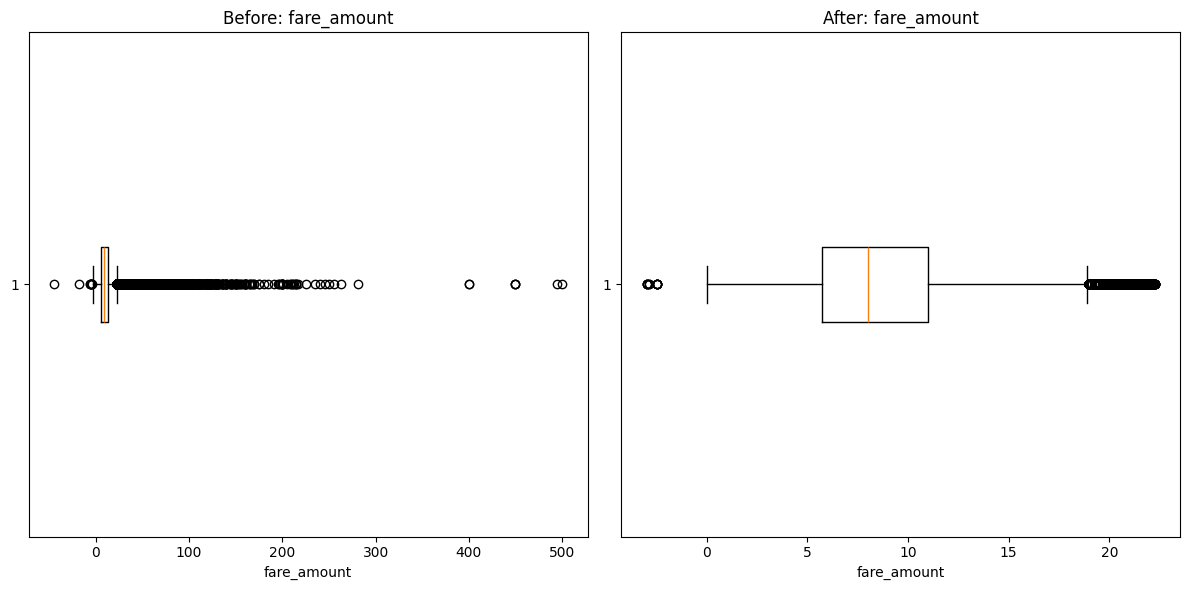

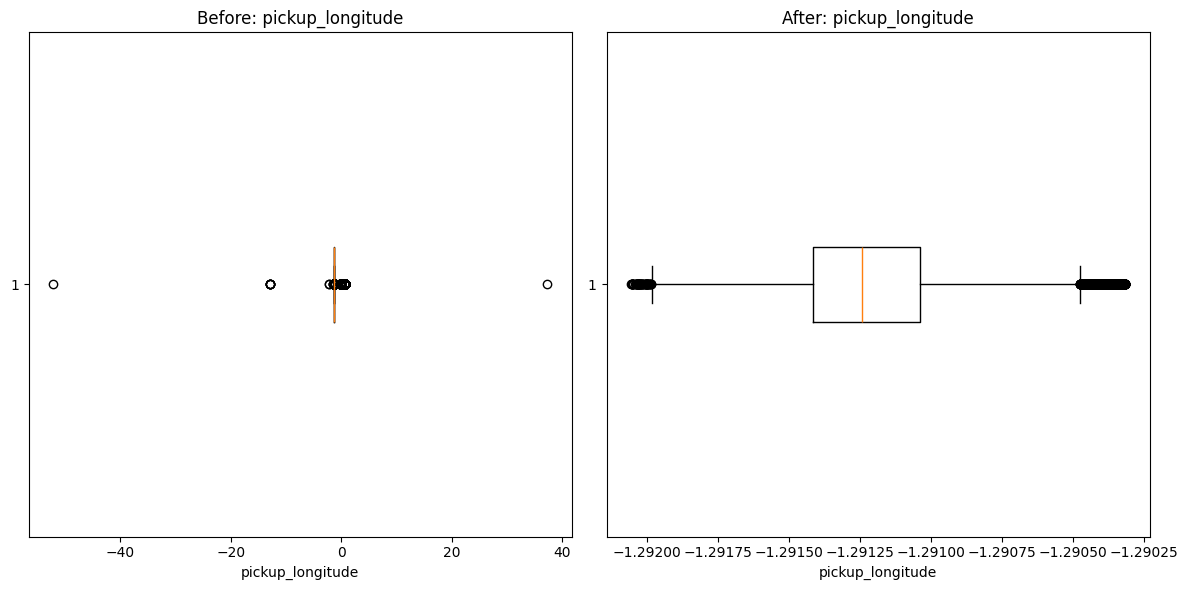

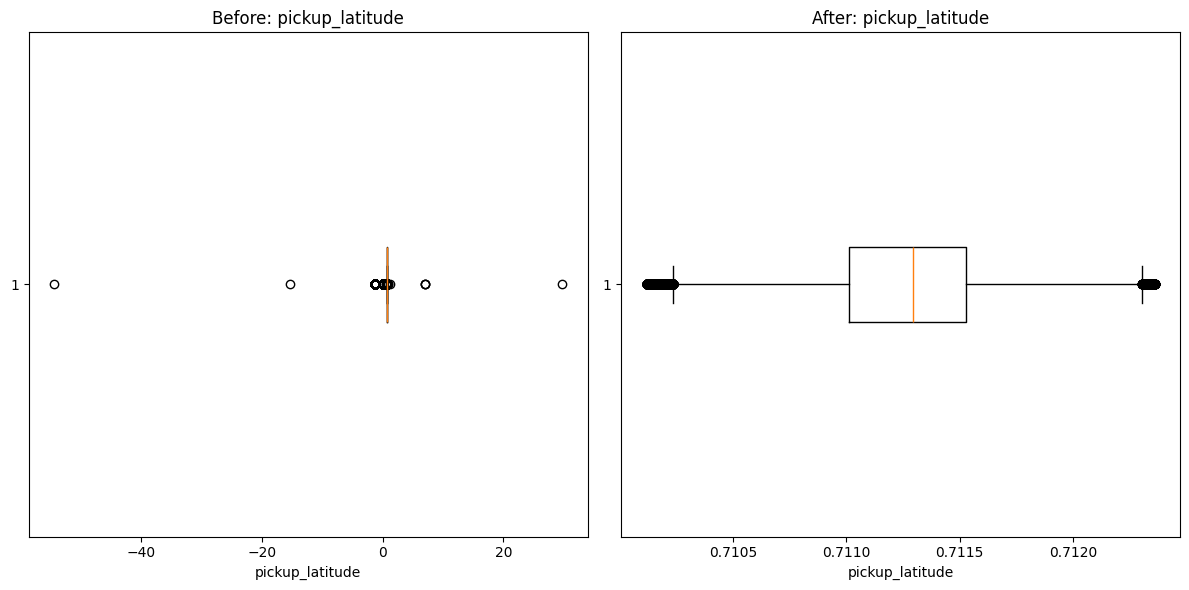

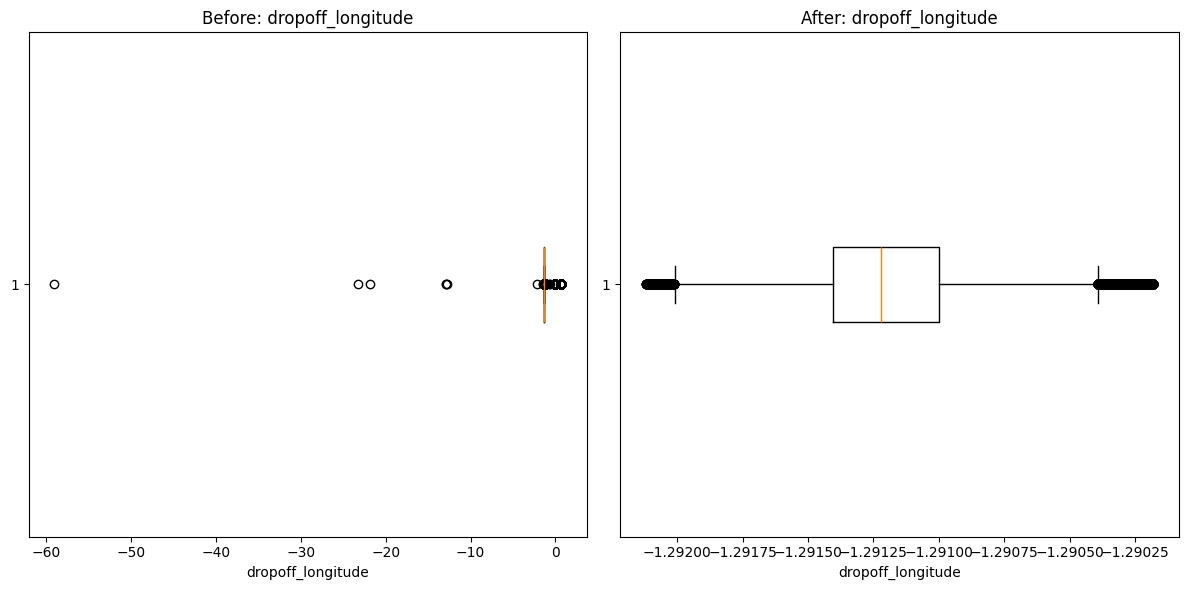

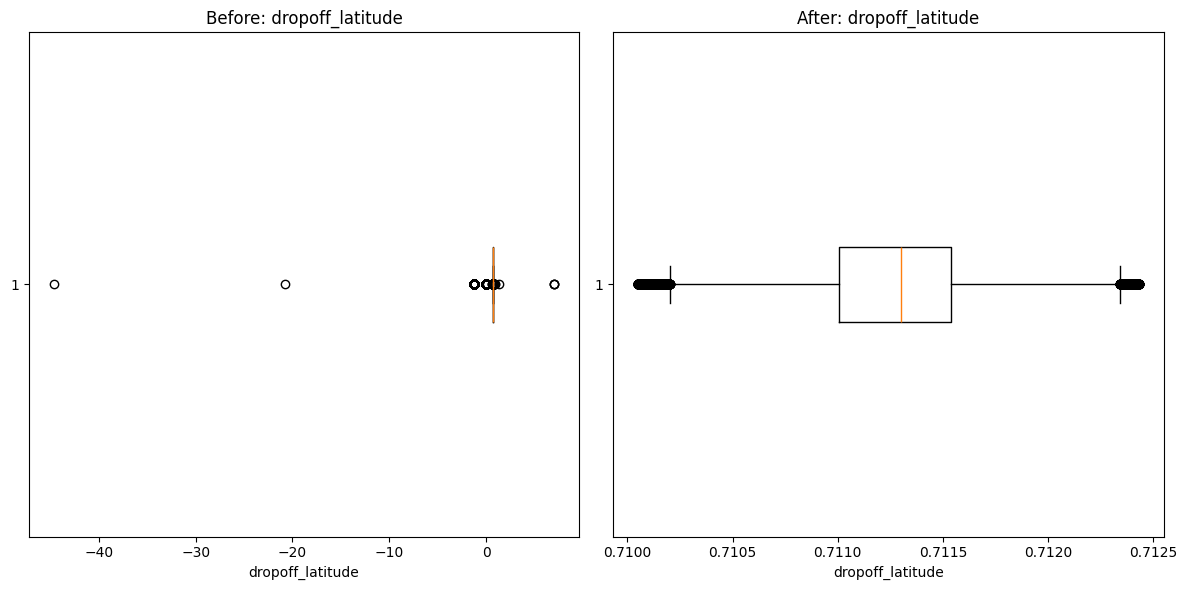

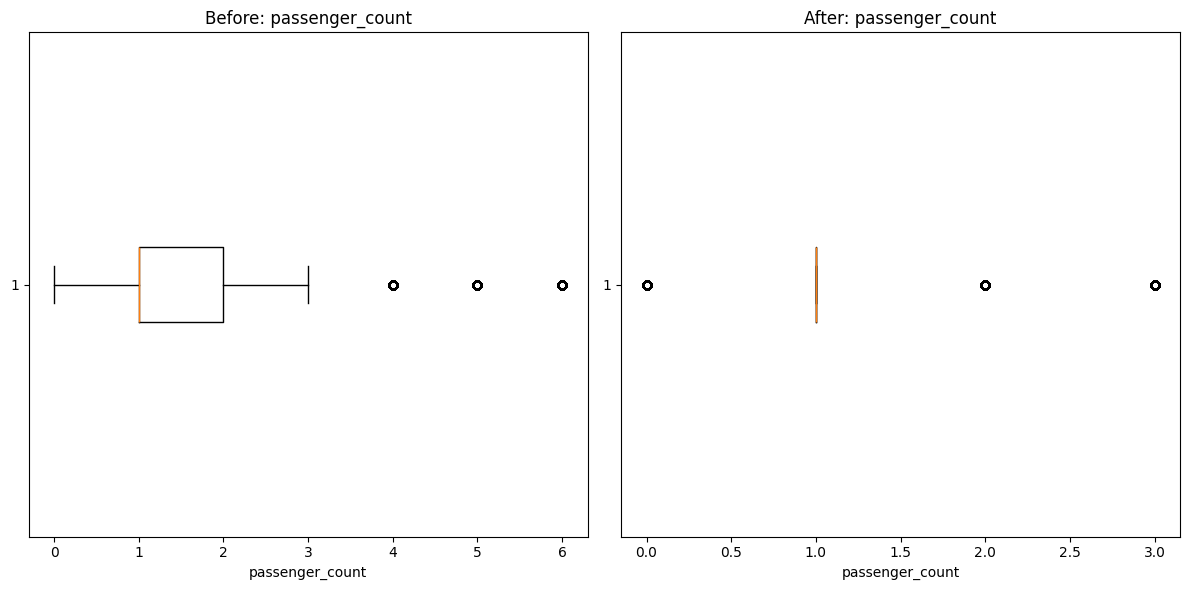

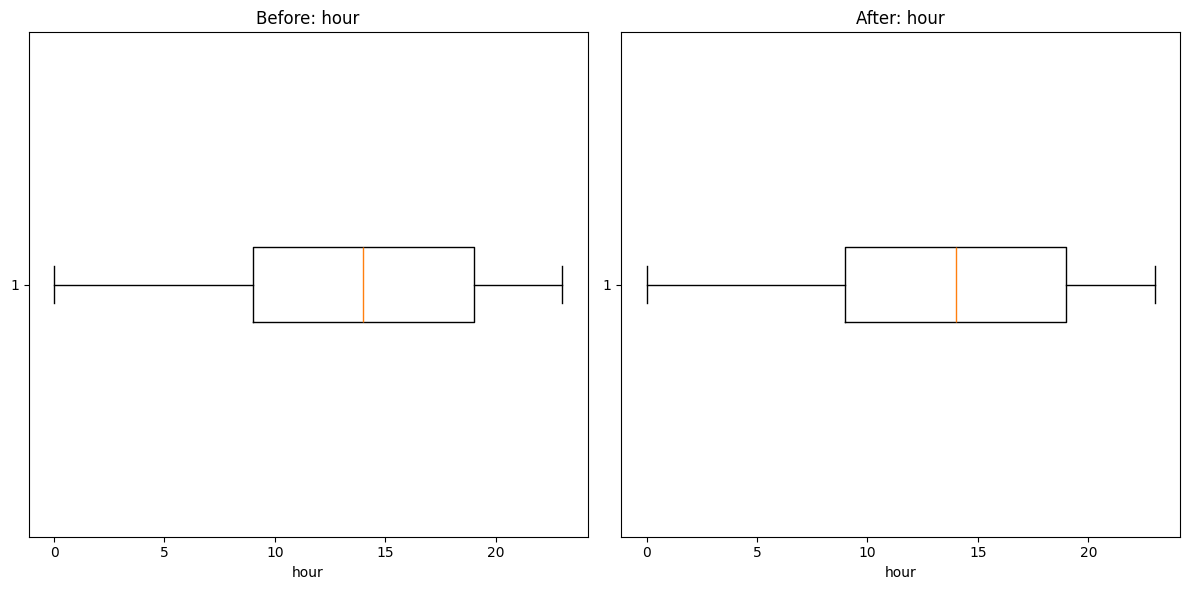

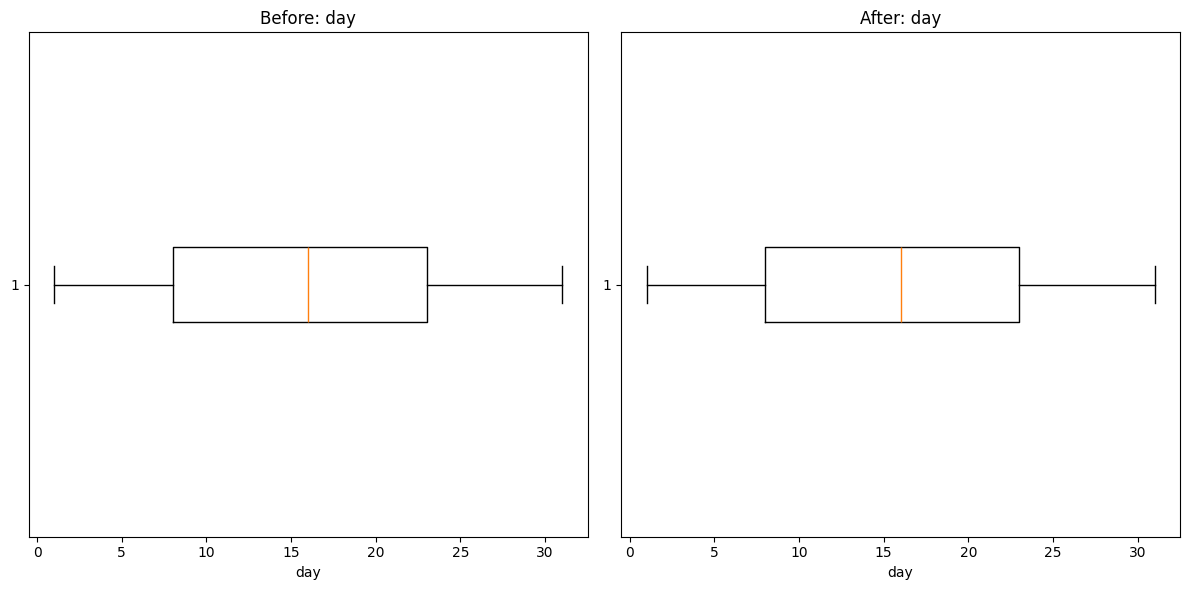

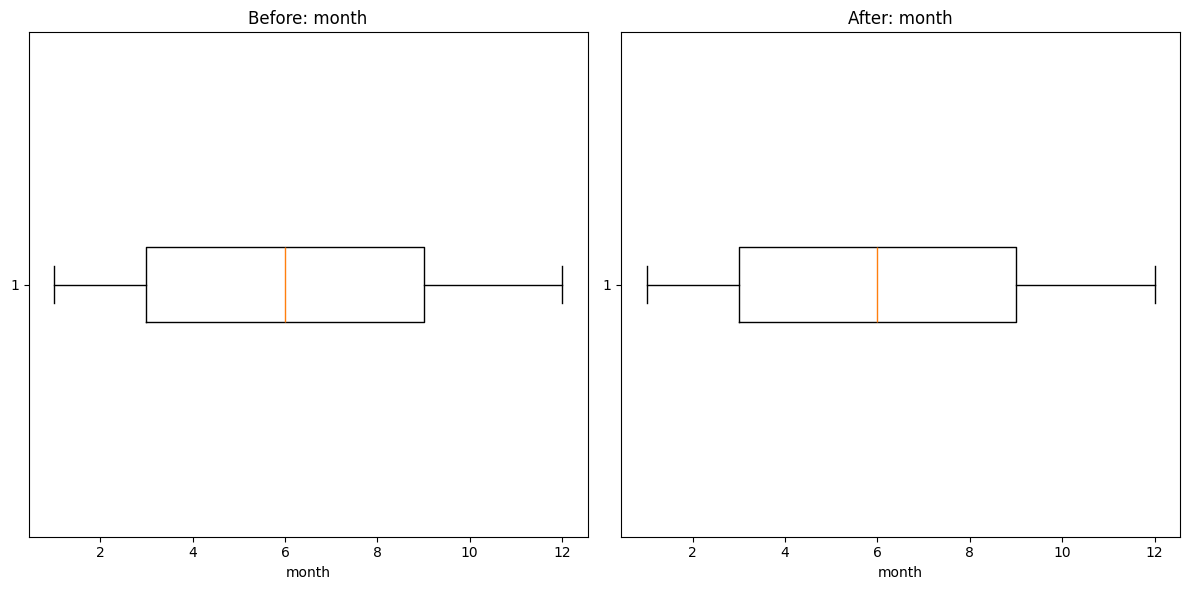

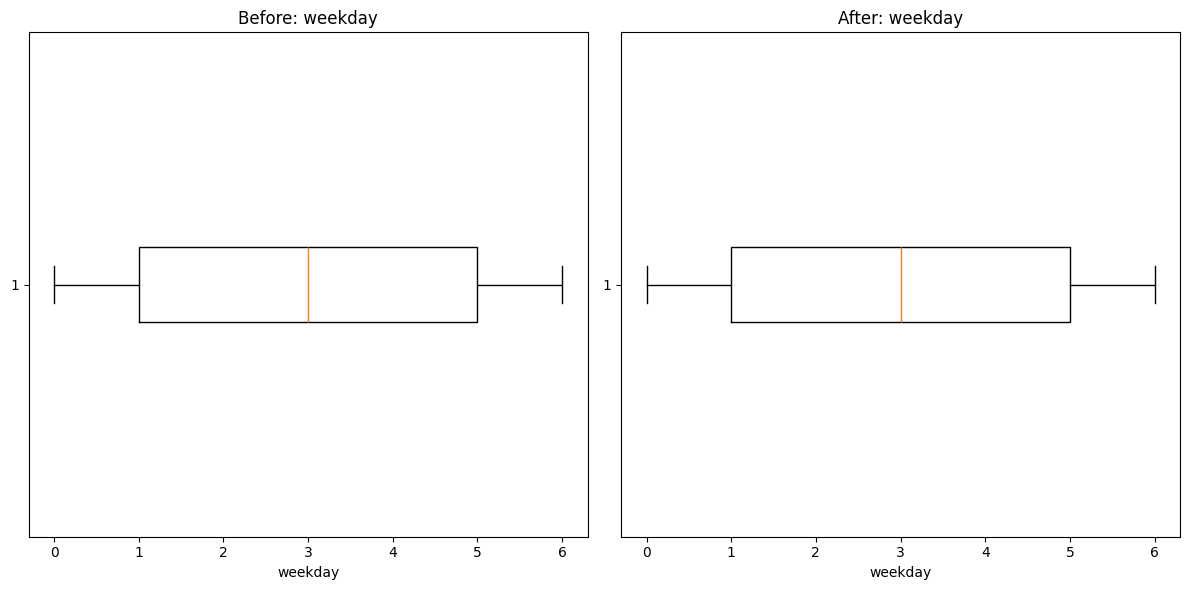

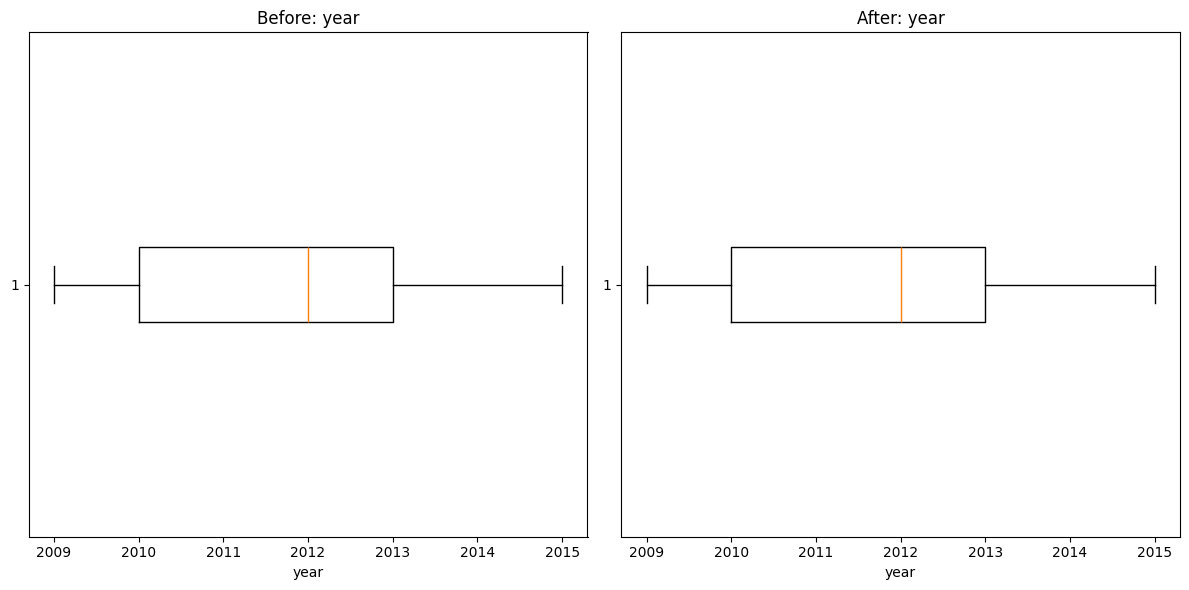

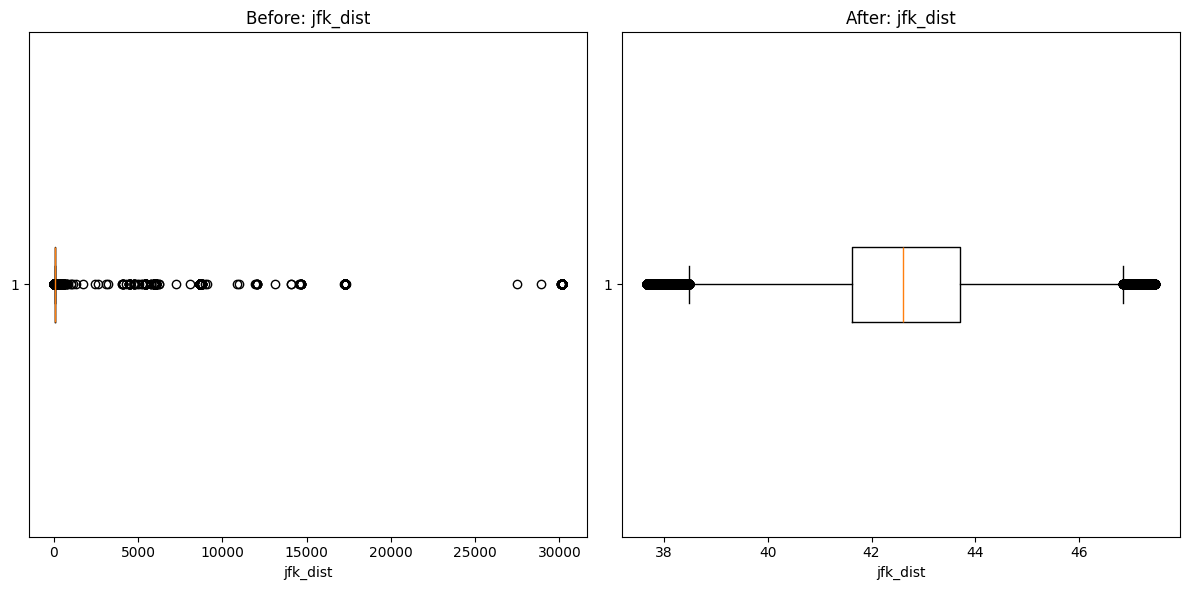

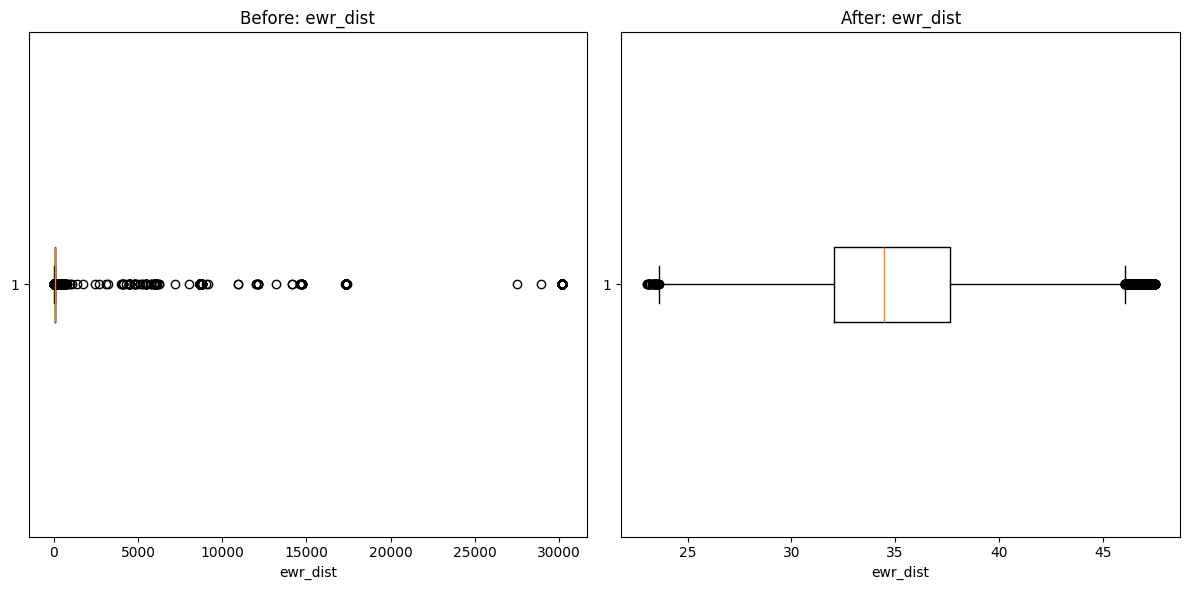

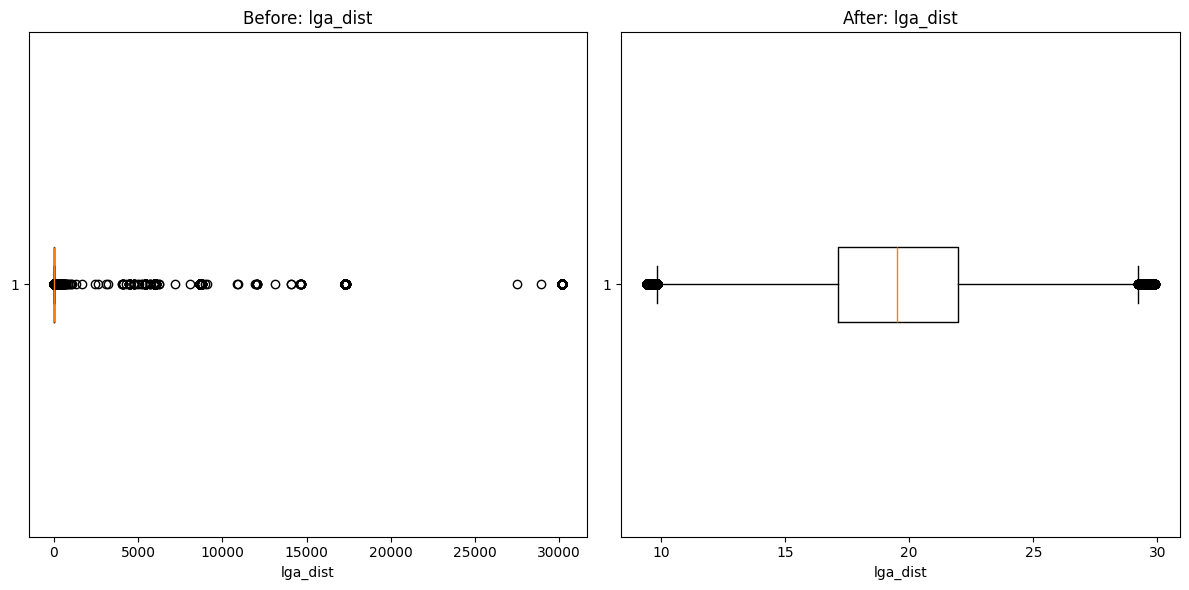

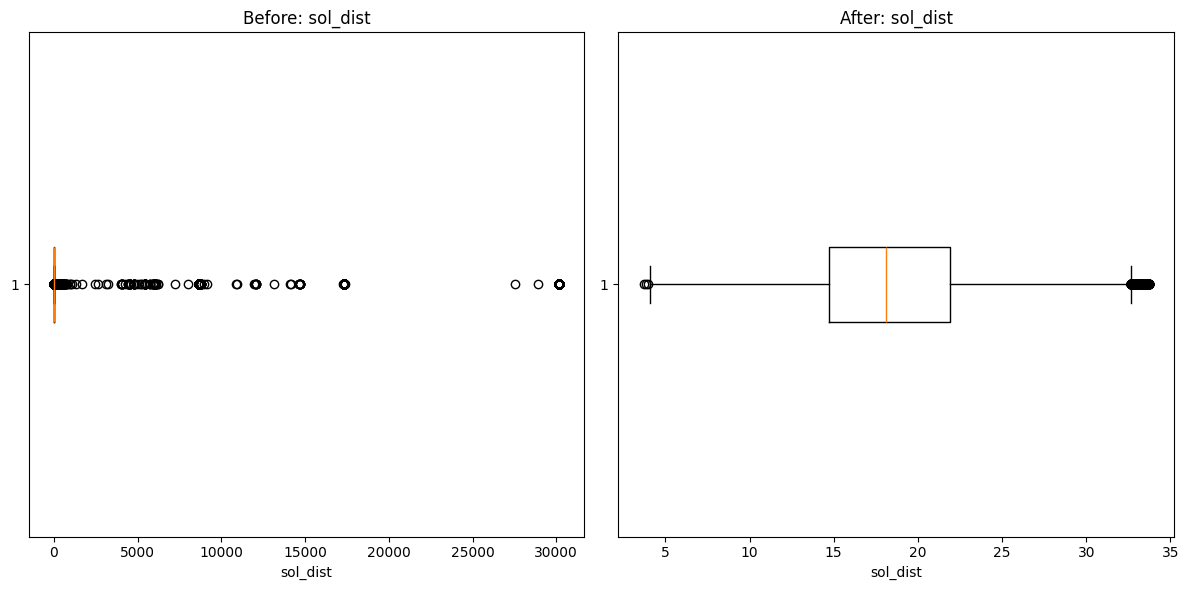

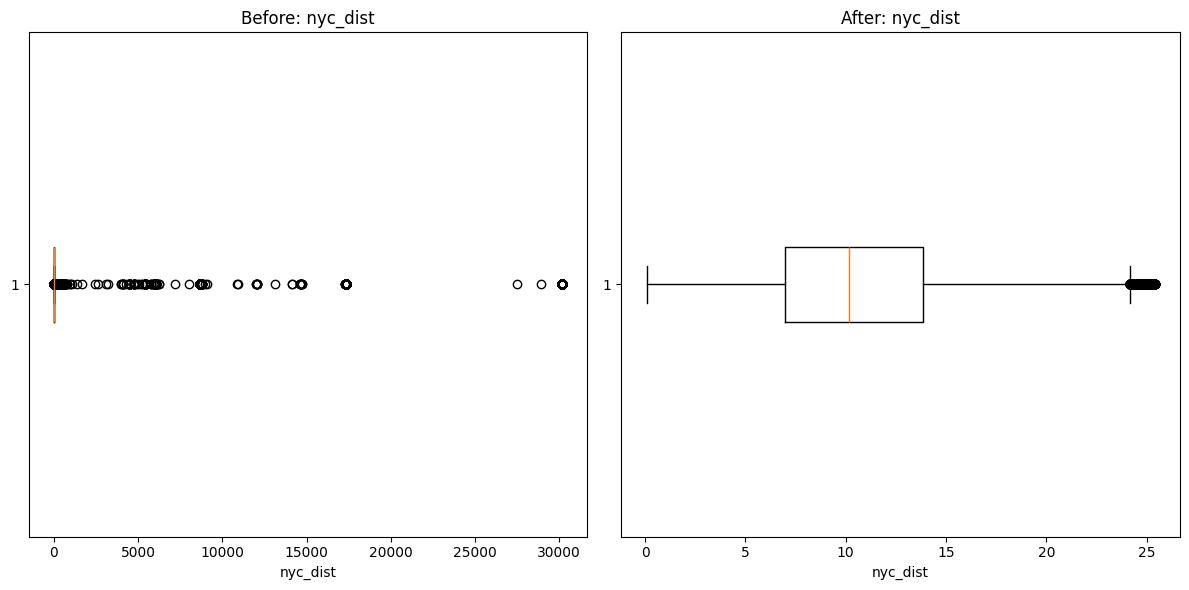

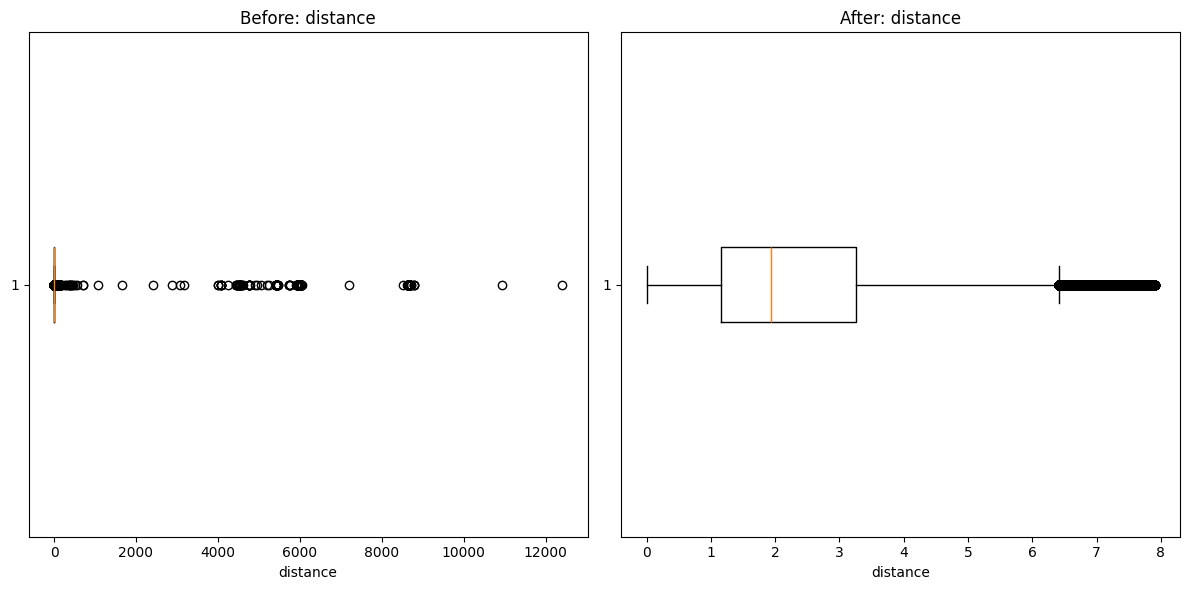

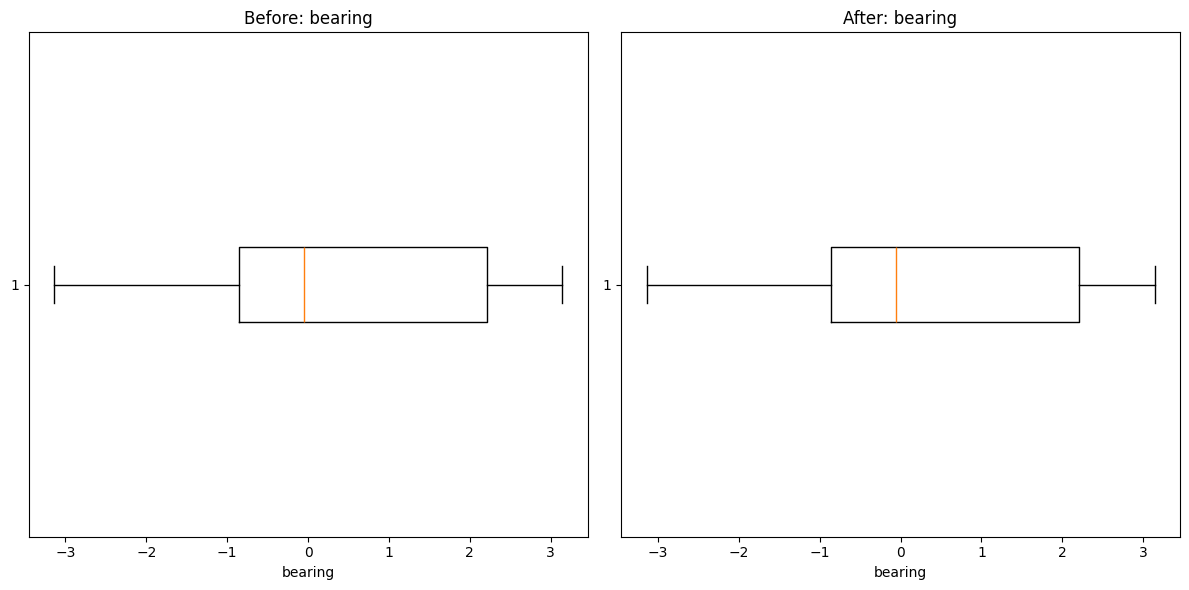

In [45]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
#  Create a copy of the original DataFrame for visualization
df_original = df.copy()
#  Initialize a dictionary to store outlier counts
outlier_counts = {}
# Function to calculate outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)
#  Replace outliers with NaN and count outliers
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    df.loc[outliers, column] = None  # Replace outliers with NaN
    outlier_counts[column] = outliers.sum()  # Store outlier count
    print(f"Outliers in '{column}': {outliers.sum()}")
#  Print total outlier counts
print("\nTotal outliers per column:")
print(outlier_counts)

#  Visualize the data before and after handling outliers
for column in numerical_columns:
    # Create a figure with two subplots (before and after)
    plt.figure(figsize=(12, 6))
    #  Boxplot before handling outliers (using original data)
    plt.subplot(1, 2, 1)
    plt.boxplot(df_original[column].dropna(), vert=False)  # Drop NaN for visualization
    plt.title(f'Before: {column}')
    plt.xlabel(column)
    #  Boxplot after handling outliers (using modified data)
    plt.subplot(1, 2, 2)
    plt.boxplot(df[column].dropna(), vert=False)  # Drop NaN for visualization
    plt.title(f'After: {column}')
    plt.xlabel(column)
    # Show the plot
    plt.tight_layout()
    plt.show()





---
* Histograms for numerical features after handling Outliers :
---



In [46]:
print("\nHistograms for Numerical Features:")
df.hist(bins=30, figsize=(20, 15))
plt.show()


Histograms for Numerical Features:




---
* Correlation heatmap for numerical features after handling outliers :
---




Correlation Heatmap:


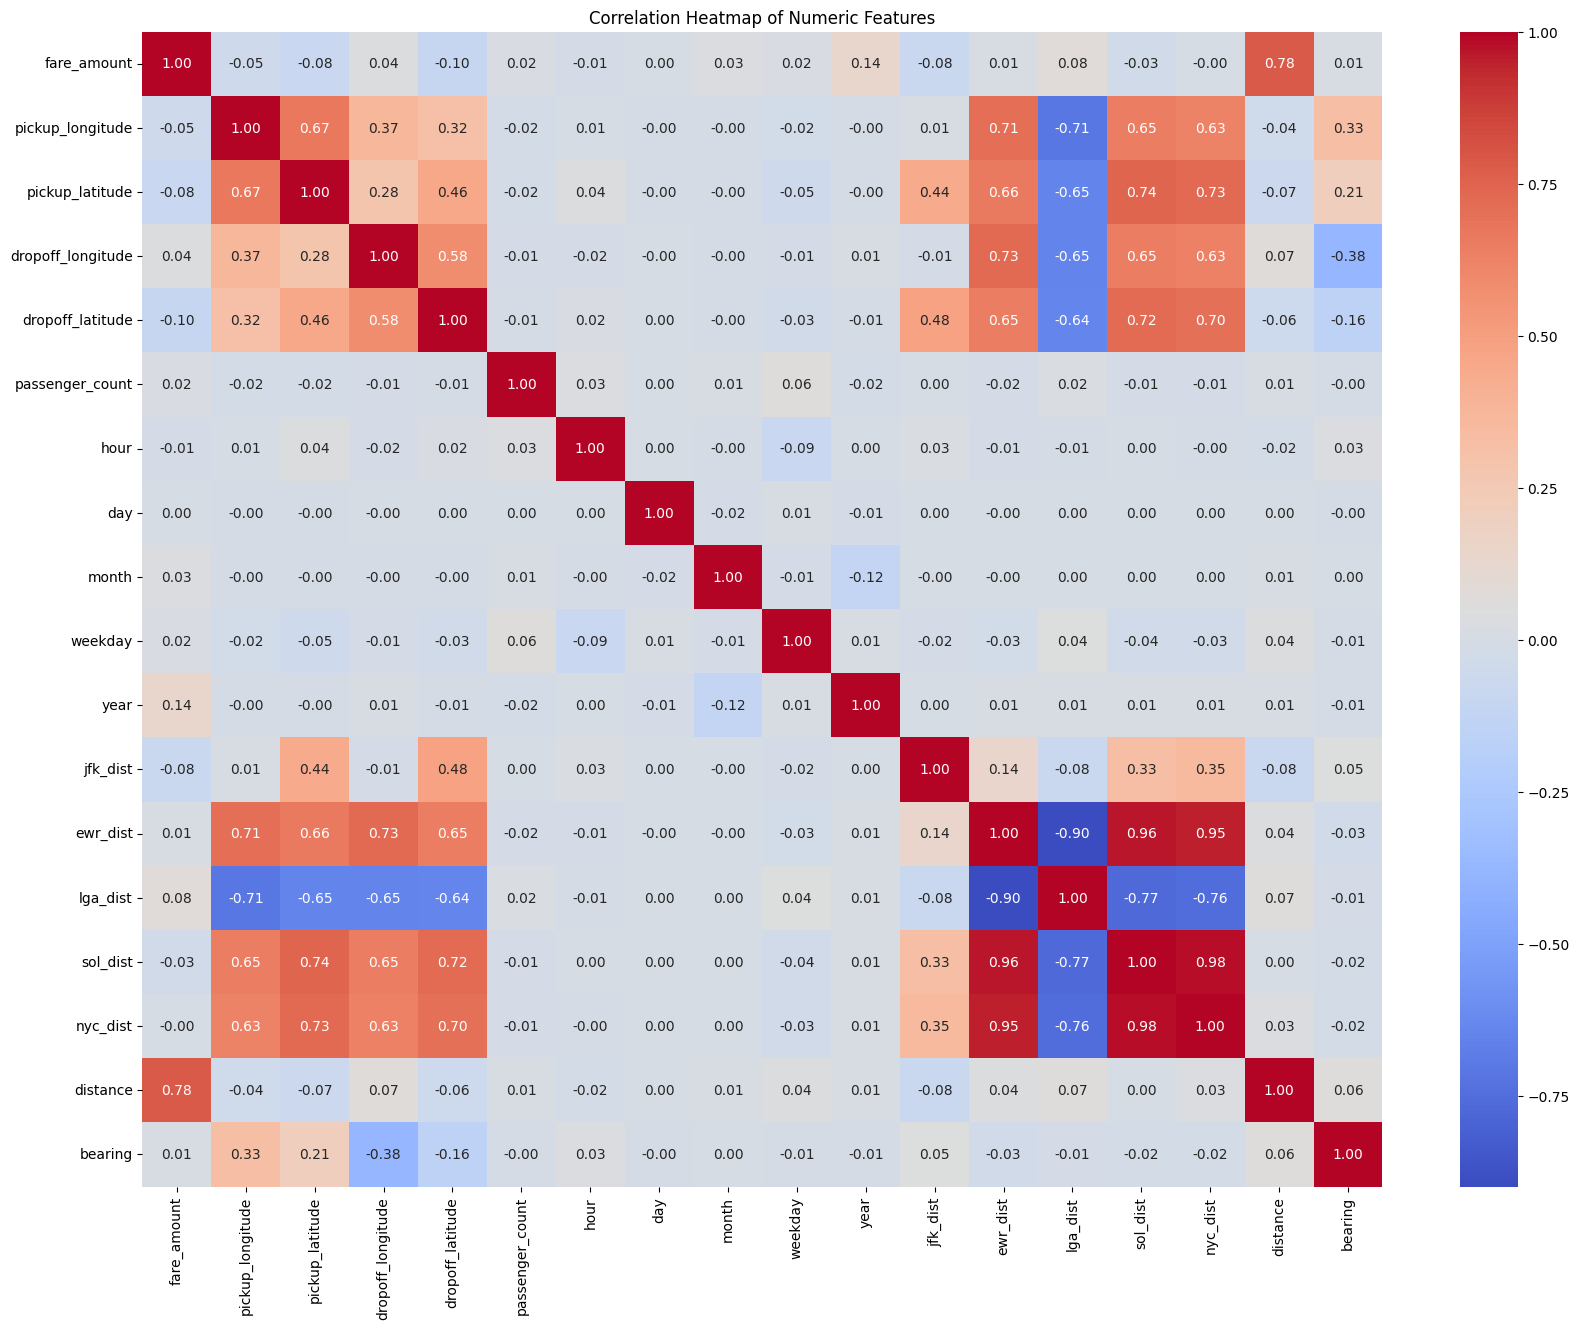

In [47]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Generate the correlation heatmap
print("\nCorrelation Heatmap:")
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



---
* Feature impact analysis for some numerical features :
---




Pairplot for Feature Impact Analysis:


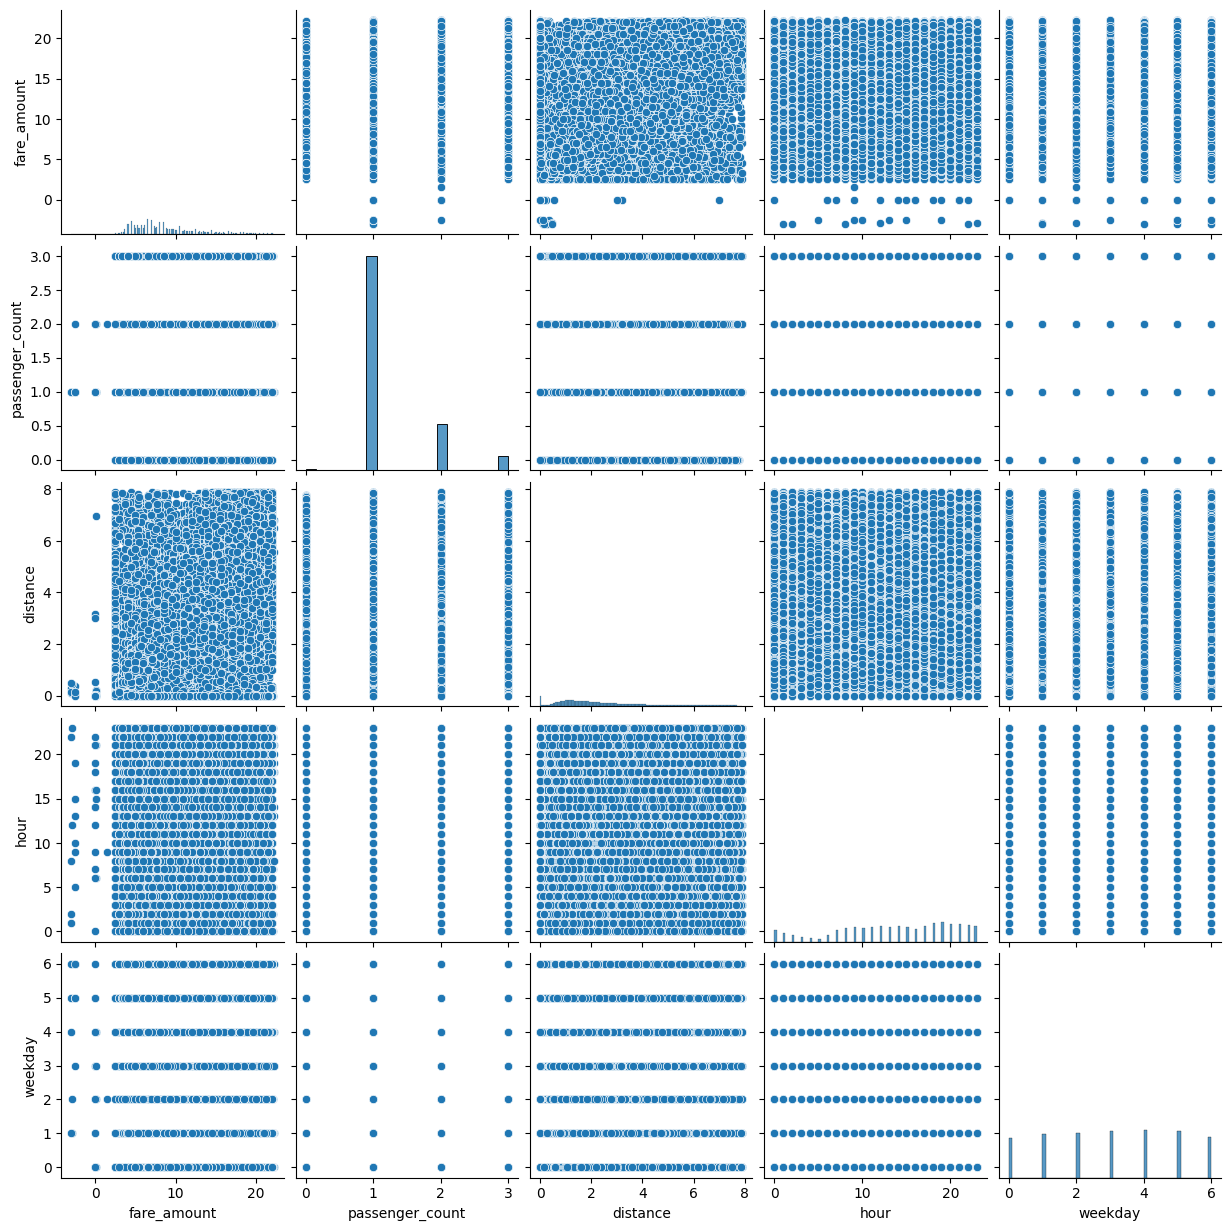

In [48]:
print("\nPairplot for Feature Impact Analysis:")
sns.pairplot(df[['fare_amount', 'passenger_count', 'distance', 'hour', 'weekday']])
plt.show()



---
* Scatter plots for specific feature relationships :
---




Scatter Plots for Feature Relationships:


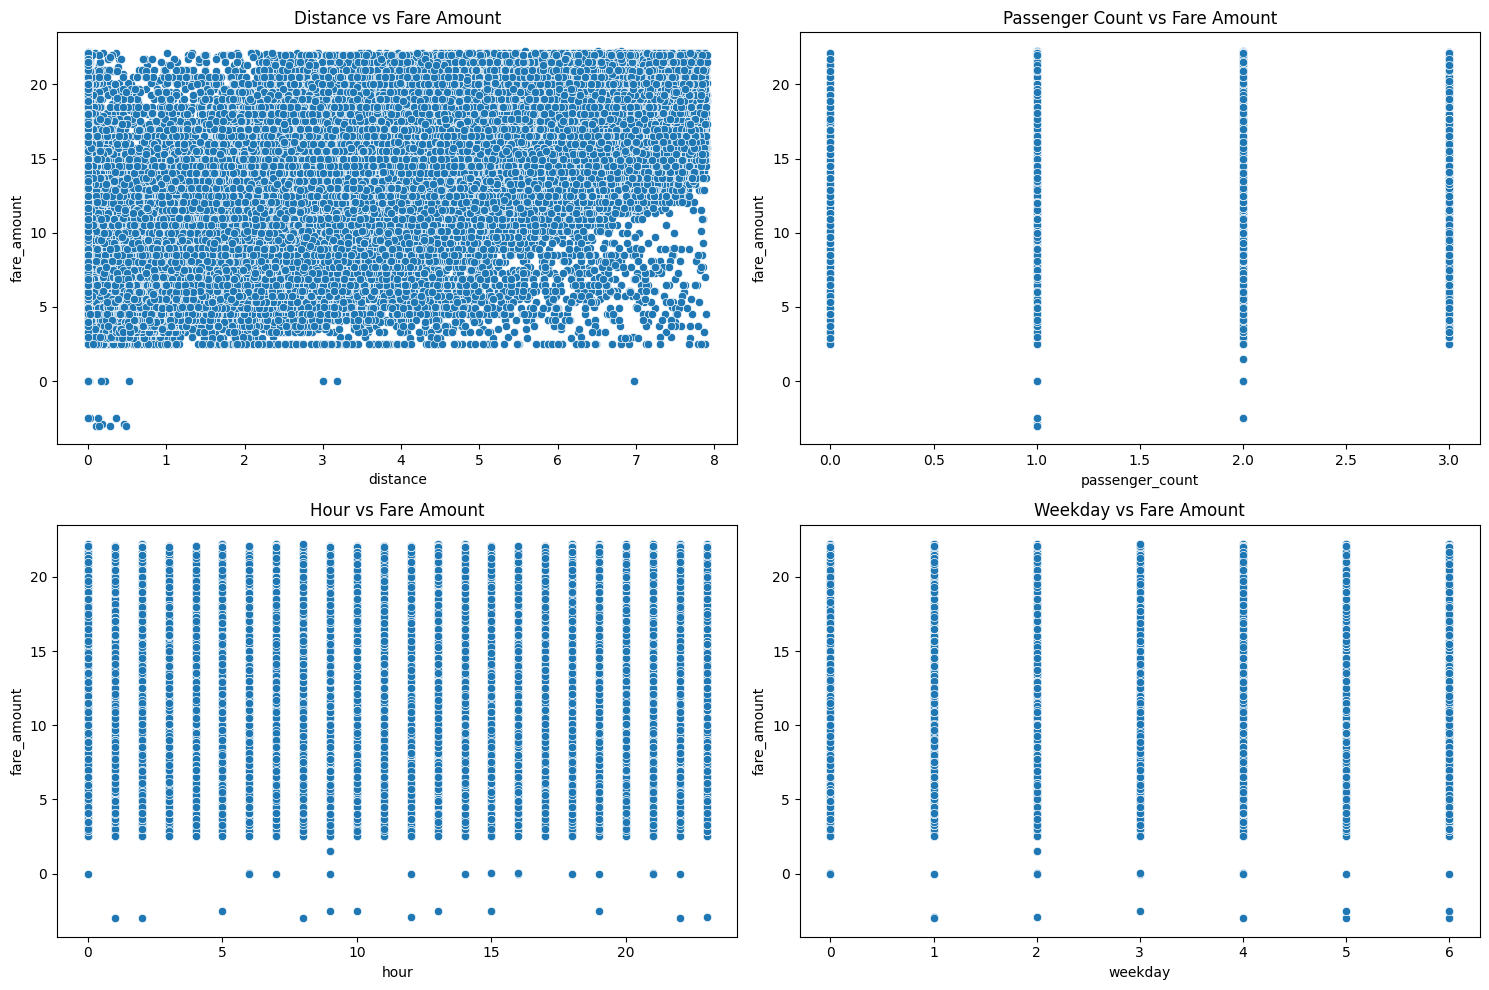

In [49]:
print("\nScatter Plots for Feature Relationships:")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='distance', y='fare_amount', data=df)
plt.title("Distance vs Fare Amount")
plt.subplot(2, 2, 2)
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Passenger Count vs Fare Amount")
plt.subplot(2, 2, 3)
sns.scatterplot(x='hour', y='fare_amount', data=df)
plt.title("Hour vs Fare Amount")
plt.subplot(2, 2, 4)
sns.scatterplot(x='weekday', y='fare_amount', data=df)
plt.title("Weekday vs Fare Amount")
plt.tight_layout()
plt.show()



---
*  Violin plots for selected features :
---




Violin Plots for Selected Features:


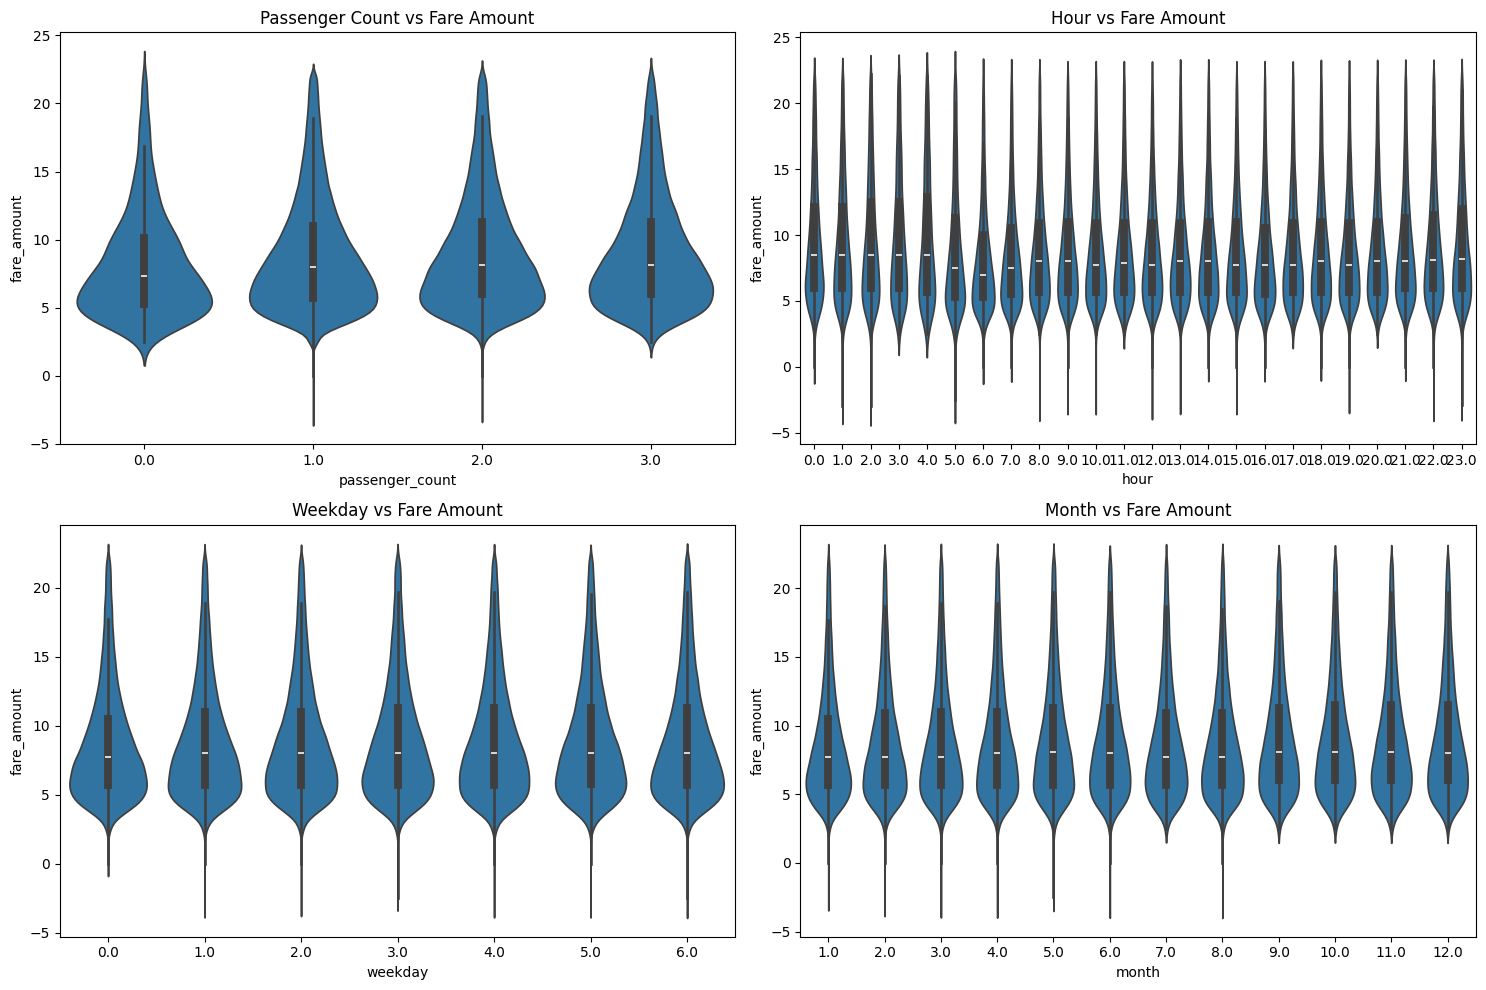

In [50]:
# Violin plots for selected features
print("\nViolin Plots for Selected Features:")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Passenger Count vs Fare Amount")
plt.subplot(2, 2, 2)
sns.violinplot(x='hour', y='fare_amount', data=df)
plt.title("Hour vs Fare Amount")
plt.subplot(2, 2, 3)
sns.violinplot(x='weekday', y='fare_amount', data=df)
plt.title("Weekday vs Fare Amount")
plt.subplot(2, 2, 4)
sns.violinplot(x='month', y='fare_amount', data=df)
plt.title("Month vs Fare Amount")
plt.tight_layout()
plt.show()



---
* Boxplot for whole numerical features using melted dataframe :
---



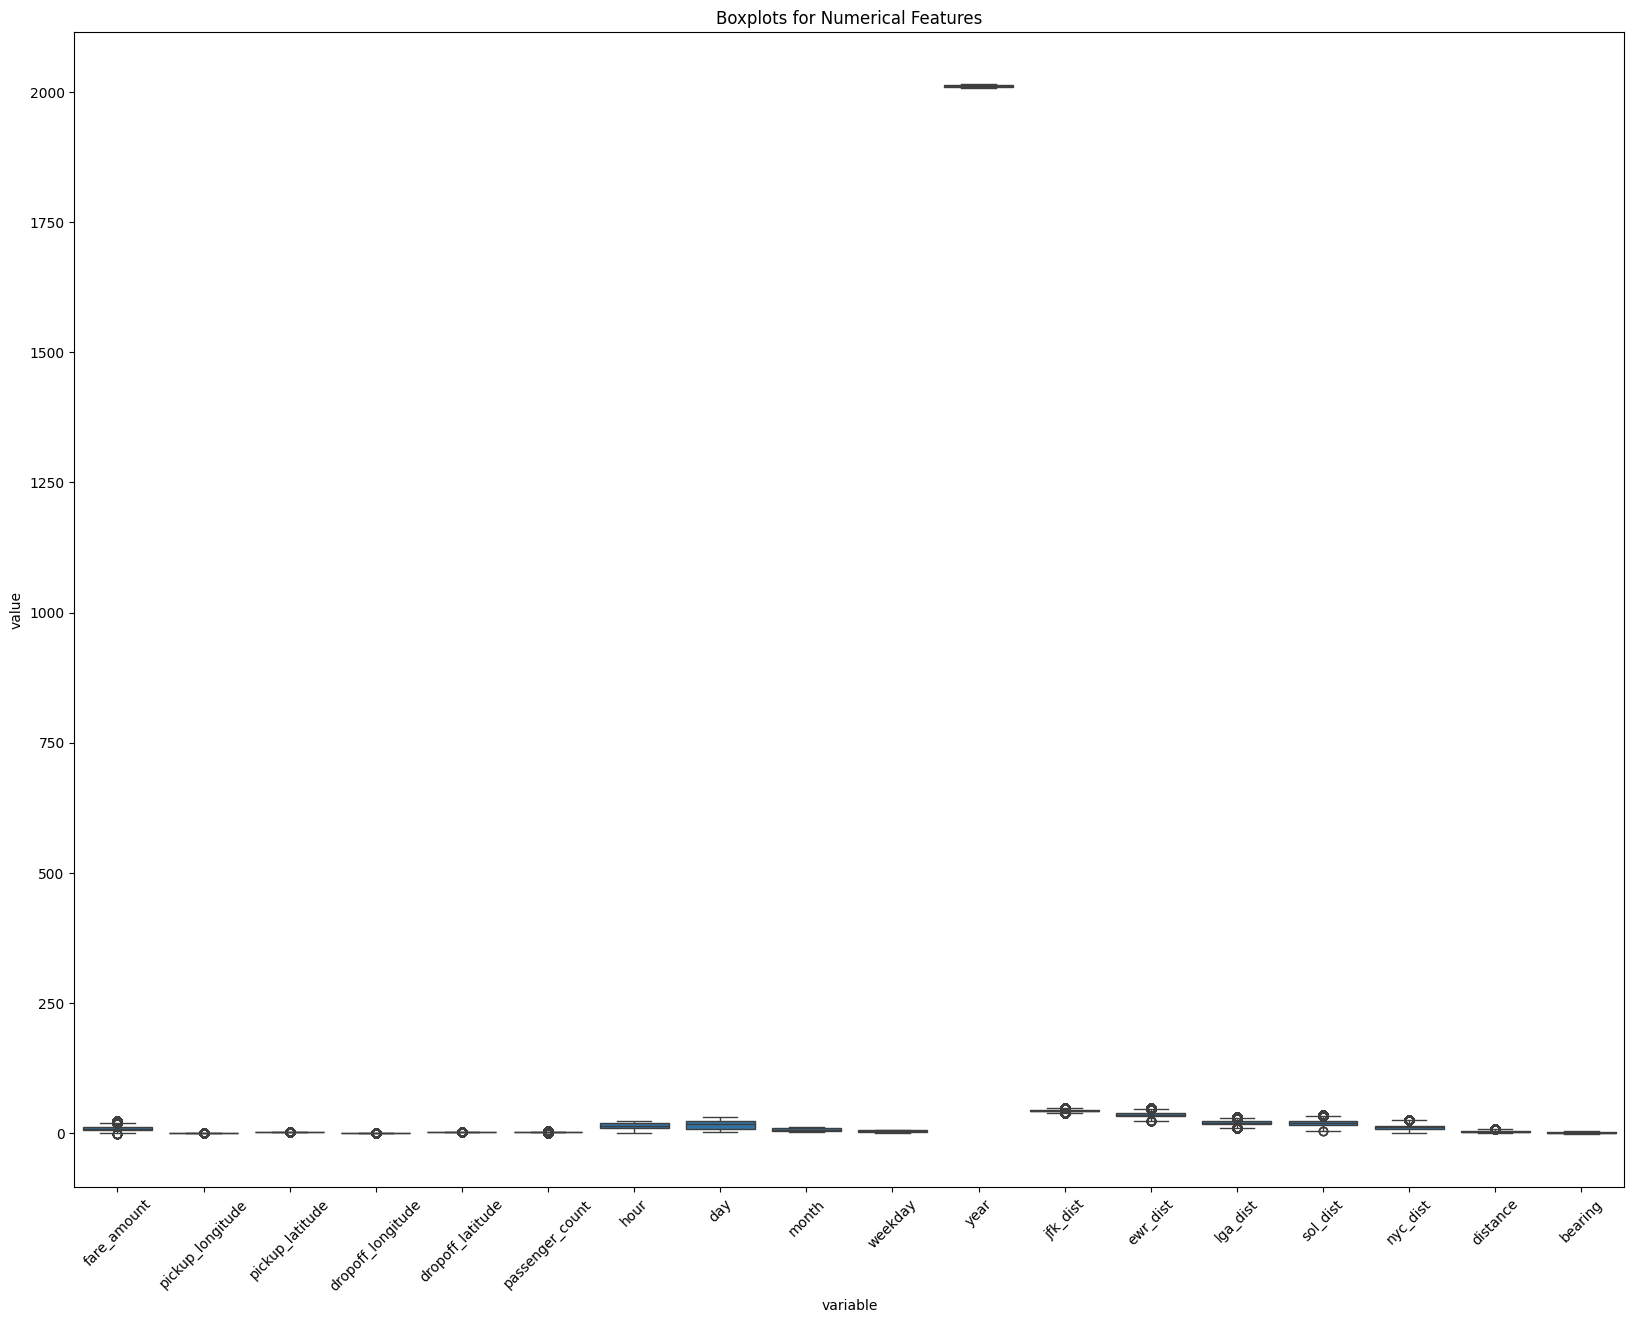

In [51]:
# Melt the DataFrame for Seaborn
df_melted = df.melt(value_vars=numerical_features)
# Create boxplots
plt.figure(figsize=(20, 15))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xticks(rotation=45)
plt.title("Boxplots for Numerical Features")
plt.show()



---
* Distribution of fare amount by weather :
---



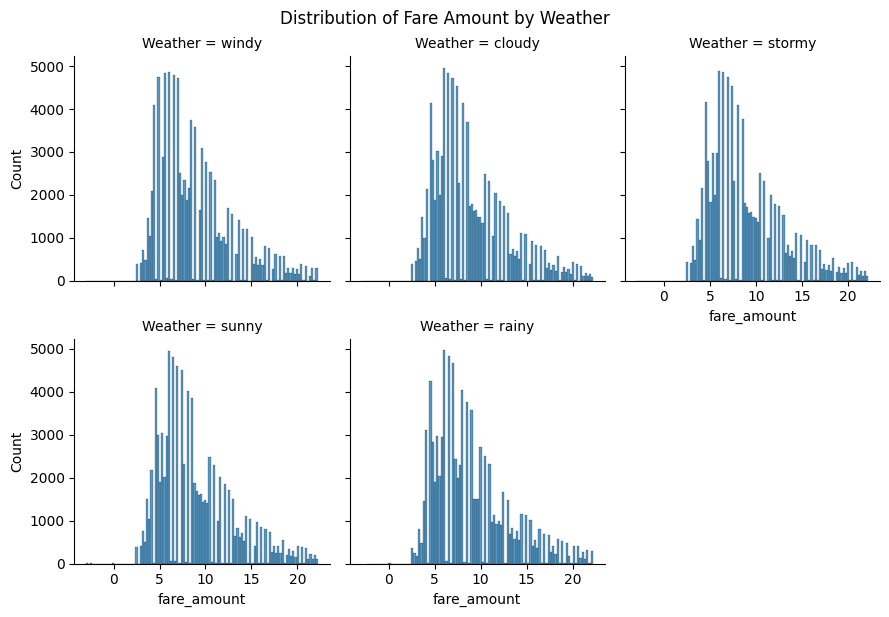

In [52]:
g = sns.FacetGrid(df, col='Weather', col_wrap=3)
g.map(sns.histplot, 'fare_amount')
g.fig.suptitle("Distribution of Fare Amount by Weather", y=1.02)
plt.show()

In [53]:
weather_categories = df['Weather'].unique()  # Get unique weather categories
# Create a grid of subplots
num_categories = len(weather_categories)
num_rows = (num_categories + 2) // 3  # Adjust the number of rows based on the number of categories
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size dynamically
# Loop through each weather category and plot a histogram of fare_amount
for i, weather in enumerate(weather_categories, 1):
    plt.subplot(num_rows, 3, i)  # 3 columns per row
    df[df['Weather'] == weather]['fare_amount'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Weather: {weather}')
    plt.xlabel('Fare Amount')
    plt.ylabel('Frequency')
plt.suptitle("Distribution of Fare Amount by Weather", y=1.02)  # Add a main title
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



---
* Cross-Tabulation of Weather and Traffic Condition :
---



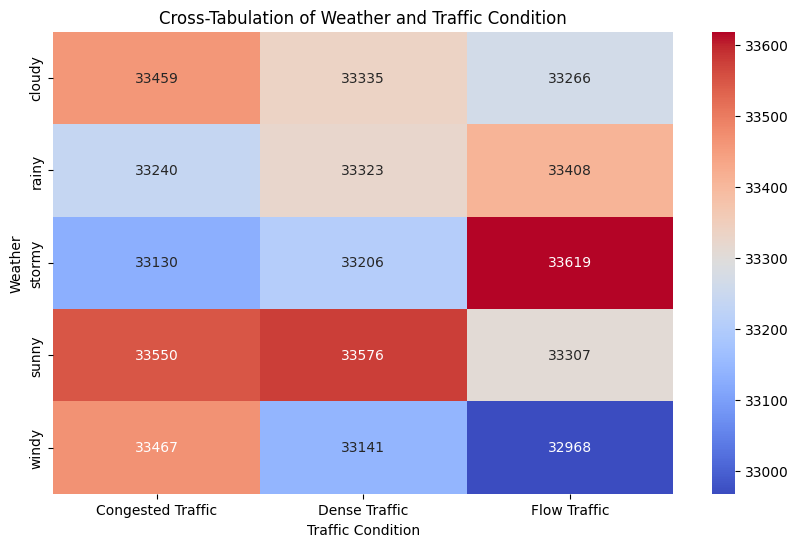

In [54]:
cross_tab = pd.crosstab(df['Weather'], df['Traffic Condition'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title("Cross-Tabulation of Weather and Traffic Condition")
plt.show()



---
* Grouped Count Plot of Weather and Traffic Condition :
---



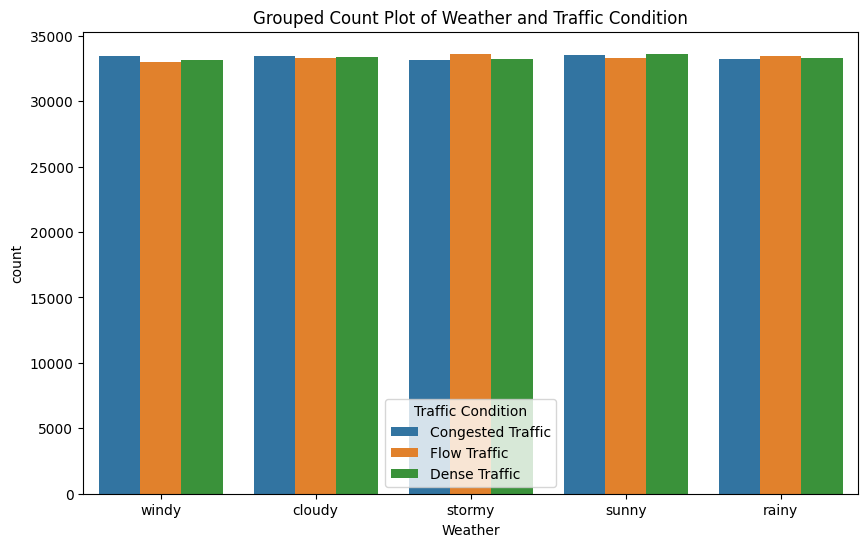

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', hue='Traffic Condition', data=df)
plt.title("Grouped Count Plot of Weather and Traffic Condition")
plt.show()



---
* A ScatterPlot for Pickup and Dropoff Locations :
---



In [56]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.5, label='Pickup')
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, alpha=0.5, label='Dropoff')
plt.title("Pickup and Dropoff Locations")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)




---
* Density of Pickup Locations :
---



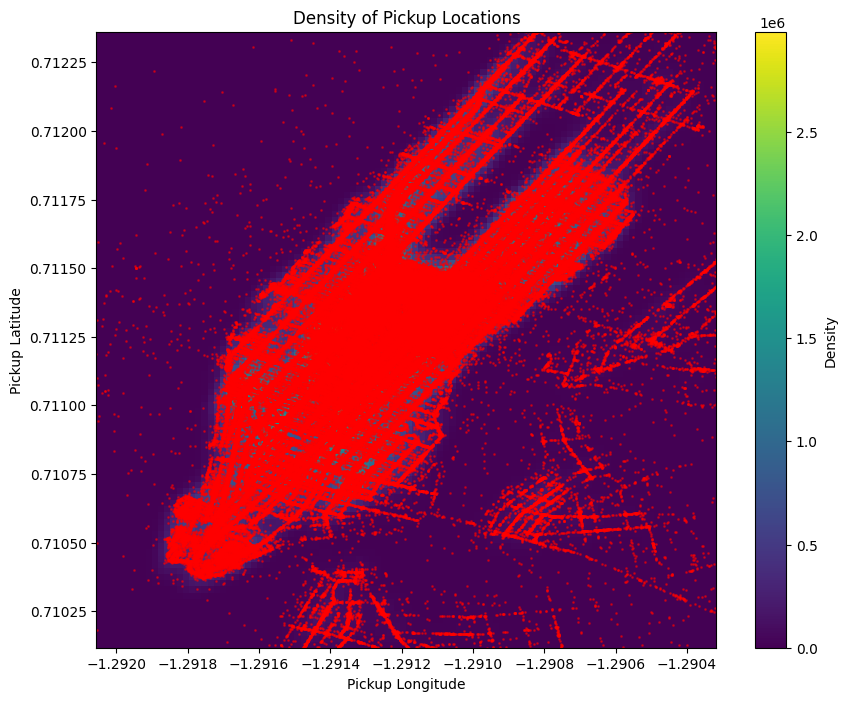

In [57]:
# Assuming df is your DataFrame
x = df['pickup_longitude'].values
y = df['pickup_latitude'].values
# Remove NaN and inf values
mask = np.isfinite(x) & np.isfinite(y)  # Create a mask for finite values
x_clean = x[mask]  # Apply the mask to x
y_clean = y[mask]  # Apply the mask to y
#  Create a grid for the KDE
x_grid, y_grid = np.mgrid[x_clean.min():x_clean.max():100j, y_clean.min():y_clean.max():100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
# Compute the KDE
kde = gaussian_kde(np.vstack([x_clean, y_clean]))  # Use cleaned data
density = np.reshape(kde(positions).T, x_grid.shape)
# Plot the density plot
plt.figure(figsize=(10, 8))
plt.imshow( np.rot90(density),  # Rotate the density for correct orientation
    cmap='viridis',  # Use the same colormap as Seaborn
    extent=[x_clean.min(), x_clean.max(), y_clean.min(), y_clean.max()],  # Set axis limits
    aspect='auto'  # Adjust aspect ratio
)
plt.colorbar(label='Density')  # Add a colorbar
plt.scatter(x_clean, y_clean, s=1, c='red', alpha=0.5)  # Overlay scatter plot of points
plt.title("Density of Pickup Locations")
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()



---
* Average Fare Amount Over Time:
---



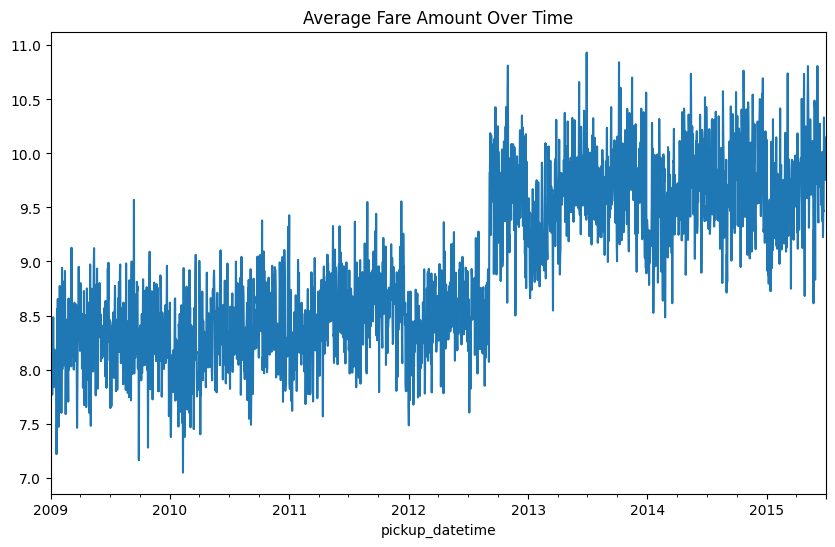

In [58]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.set_index('pickup_datetime', inplace=True)
plt.figure(figsize=(10, 6))
df.resample('D')['fare_amount'].mean().plot()
plt.title("Average Fare Amount Over Time")
plt.show()



---
* Average Fare Amount by Hour of the Day :
---



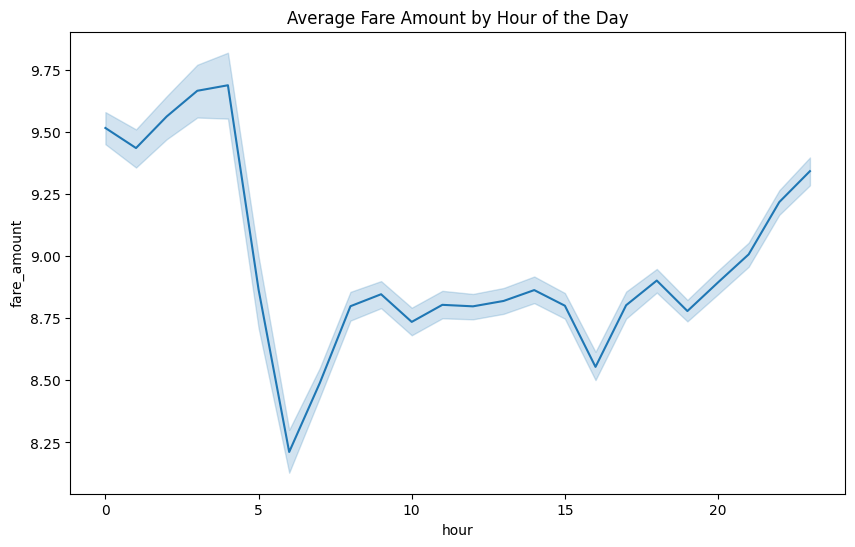

In [59]:
df_reset = df.reset_index(drop=True)
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='fare_amount', data=df_reset, estimator='mean')
plt.title("Average Fare Amount by Hour of the Day")
plt.show()



---
* Bar Plots for Categorical Data :
---



In [60]:
# Sample 10% of the data for faster plotting
df_sample = df.sample(frac=0.1, random_state=42)
# Filter out columns with too many unique values
categorical_columns = [col for col in df_sample.select_dtypes(include=['object']).columns if df_sample[col].nunique() < 20]
# Create a grid of subplots
num_columns = len(categorical_columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size dynamically
# Loop through each categorical column and plot a bar chart
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)  # 3 columns per row
    df_sample[column].value_counts().plot(kind='bar', color='skyblue')  # Use Pandas plotting
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.suptitle("Bar Plots for Categorical Data", y=1.02)  # Add a main title
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



---
* The impact of different airports distances on fare amount and general distance :
---



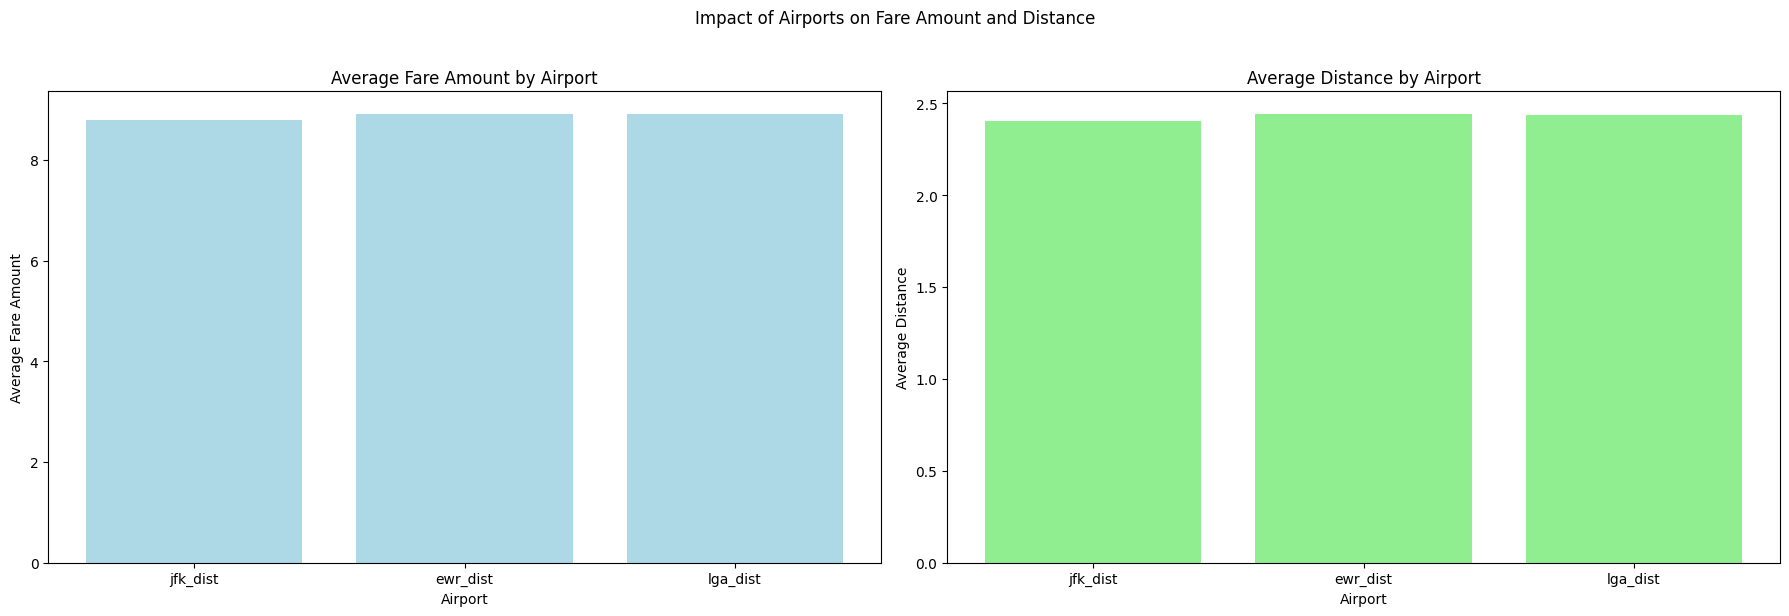

In [61]:
airport_columns = ['jfk_dist', 'ewr_dist', 'lga_dist']  # Columns representing distances to airports
# Calculate average fare_amount and distance for each airport
avg_fare = [df[df[col].notna()]['fare_amount'].mean() for col in airport_columns]
avg_distance = [df[df[col].notna()]['distance'].mean() for col in airport_columns]
# Create a grid of subplots
plt.figure(figsize=(18, 6))
# Bar plot for average fare_amount
plt.subplot(1, 2, 1)  # First subplot
plt.bar(airport_columns, avg_fare, color='lightblue')
plt.title('Average Fare Amount by Airport')
plt.xlabel('Airport')
plt.ylabel('Average Fare Amount')
# Bar plot for average distance
plt.subplot(1, 2, 2)  # Second subplot
plt.bar(airport_columns, avg_distance, color='lightgreen')
plt.title('Average Distance by Airport')
plt.xlabel('Airport')
plt.ylabel('Average Distance')

plt.suptitle("Impact of Airports on Fare Amount and Distance", y=1.02)  # Add a main title
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



---
* Mean Fare Amount by Traffic Condition :
---



In [62]:
# Calculate mean fare_amount for each traffic condition
mean_fare_by_traffic = df_sample.groupby('Traffic Condition')['fare_amount'].mean()
# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_fare_by_traffic.index, mean_fare_by_traffic.values, color='skyblue')
plt.title('Mean Fare Amount by Traffic Condition')
plt.xlabel('Traffic Condition')
plt.ylabel('Mean Fare Amount')
plt.show()



---
* Impact of Weather and Car Condition on Fare Amount :
---



<Figure size 1200x600 with 0 Axes>

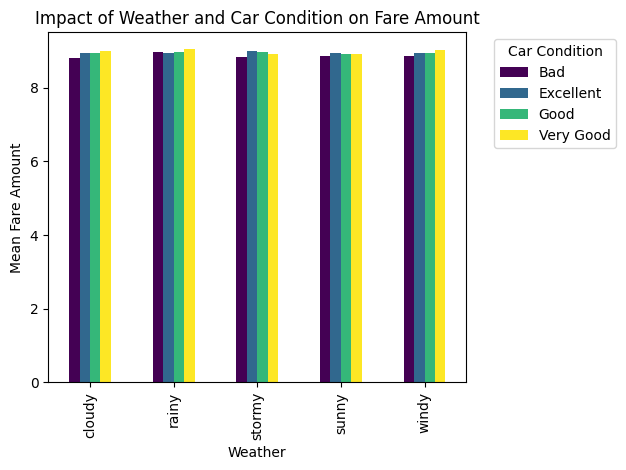

In [63]:
# Sample 10% of the data for faster plotting (optional)
df_sample = df.sample(frac=0.1, random_state=42)  # Randomly sample 10% of the data
# Group data by Weather and Car Condition, and calculate mean fare_amount
grouped_data = df_sample.groupby(['Weather', 'Car Condition'])['fare_amount'].mean().unstack()
# Plot the grouped bar plot
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', colormap='viridis')
plt.title('Impact of Weather and Car Condition on Fare Amount')
plt.xlabel('Weather')
plt.ylabel('Mean Fare Amount')
plt.legend(title='Car Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




---
* Impact of Weather and Car Condition on Distance :
---



In [64]:
# Sample 10% of the data for faster plotting (optional)
df_sample = df.sample(frac=0.1, random_state=42)  # Randomly sample 10% of the data
# Group data by Weather and Car Condition, and calculate mean distance
grouped_distance = df_sample.groupby(['Weather', 'Car Condition'])['distance'].mean().unstack()
# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 6))
# Plot grouped bar plot for distance
grouped_distance.plot(kind='bar', colormap='viridis', ax=ax)
ax.set_title('Impact of Weather and Car Condition on Distance')
ax.set_xlabel('Weather')
ax.set_ylabel('Mean Distance')
ax.legend(title='Car Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [65]:
# Create a pivot table for the heatmap
pivot_distance = df_sample.pivot_table(values='distance', index='Weather', columns='Car Condition', aggfunc='mean')
# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(pivot_distance, cmap='viridis', aspect='auto')
plt.colorbar(label='Mean Distance')
plt.xticks(np.arange(len(pivot_distance.columns)), pivot_distance.columns, rotation=45)
plt.yticks(np.arange(len(pivot_distance.index)), pivot_distance.index)
plt.title('Impact of Weather and Car Condition on Distance')
plt.xlabel('Car Condition')
plt.ylabel('Weather')
plt.tight_layout()
plt.show()